# Восстановления золота из золотосодержащей руды

# Recovery of gold from gold ore

# Оглавление.

- [Шаг 0. Описание проекта.](#Step_1)
- [Шаг 1. Подготовка данных.](#Step_2)
[Пункт 1.1. Изучение файлов.](#Step_3) <br />
[Пункт 1.2. Проверка правильности расчетов обогощения после флотации.](#Step_4) <br />
[Пункт 1.3. Признаки недоступные в тестовой выборке.](#Step_5) <br />
[Пункт 1.4. Предподготовка данных.](#Step_6) <br />
- [Шаг 2. Анализ данных.](#Step_7)<br />
[Пункт 2.1. Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.](#Step_8) <br />
[Пункт 2.2. Сравним распределения размеров гранул сырья на обучающей и тестовой выборках.](#Step_9) <br />
[Пункт Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.](#Step_10) <br />
- [Шаг 3. Модель](#Step_11)<br />
[Пункт 3.1. Функция sMAPE.](#Step_12) <br />
[Пункт 3.2. Обучение и проверка моделей.](#Step_13) <br />

# Table of contents.

- [Step 0. Description of the project.](#Step_1)
- [Step 1. Data preparation.](#Step_2)
[Clause 1.1. Examining files.](#Step_3) <br />
[Clause 1.2. Checking the correctness of the calculations of enrichment after flotation.](#Step_4) <br />
[Clause 1.3. Features not available in the test set.](#Step_5) <br />
[Clause 1.4. Data preparation.](#Step_6) <br />
- [Step 2. Data analysis.](#Step_7)<br />
[Clause 2.1. Let's see how the concentration of metals (Au, Ag, Pb) changes at different stages of purification.](#Step_8) <br />
[Clause 2.2. Let's compare the size distributions of raw material granules on the training and test samples.](#Step_9) <br />
[Item Investigate the total concentration of all substances at different stages: in raw materials, in roughing and final concentrates.](#Step_10) <br />
- [Step 3. Model](#Step_11)<br />
[Clause 3.1. sMAPE function.](#Step_12) <br />
[Clause 3.2. Training and validating models.](#Step_13) <br />

<a id='Step_1'></a>
# Описание проекта

Необходтимо подготовить прототип модели машинного обучения для компании, которая разрабатывает бизнес решения для промышленных предприятий.

Разрабатываемая модель должна предсказать коэффициент восстановления золота из золотосодержащей руды, на основе данных о содержании руды и процессе ее очистки.

Эта модель оптимизирует производство для избежания открытия убыточного предприятия.


# Description of the project

It is necessary to prepare a prototype of a machine learning model for a company that develops business solutions for industrial enterprises.

The model being developed should predict the recovery factor of gold from gold-bearing ore, based on data on the grade of the ore and the process of its refining.

This model optimizes production to avoid opening a loss-making enterprise.

<a id='Step_2'></a>
# 1. Подготовка данных

# 1. Data preparation

<a id='Step_3'></a>
## 1.1. Изучение файлов.

## 1.1. Studying files.

Загрузка библиотек.

Loading libraries.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
import scipy as st
from scipy.stats import iqr
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics.scorer import make_scorer
from sklearn.model_selection import GridSearchCV

Загрузка файлов.

Downloading files.

In [ ]:
df_train = pd.read_csv('/datasets/gold_recovery_train.csv')
df_test = pd.read_csv('/datasets/gold_recovery_test.csv')
df_full = pd.read_csv('/datasets/gold_recovery_full.csv')

Выведем первые пять наблюдений полного сета.

We derive the first five observations of the complete set.

In [ ]:
df_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


Сет содержит 87 столбцов - это очень много. Нам известно, что полный сет содерижит в себе как обучающую так и тестовую выборки. Изучим именно их.

The set contains 87 columns - that's a lot. We know that a complete set contains both training and test sets. Let's study them.

Общая информация. об обучающей выборке.

General information. about the training sample.

In [ ]:
print('df_train')
print('Форма:', df_train.shape)
print('Количество дубликатов:', sum(df_train.duplicated()))
print('Число столбцов разных типов')
print(df_train.columns.to_series().groupby(df_train.dtypes).count())
total_bool = 0
for col in df_train.select_dtypes(include=['float', 'int']).columns:
    if {1,0} == set(df_train[col].unique()):
        total_bool += 1
print('Количество стобцов, которые могут оказаться bool:', total_bool)

df_train
Форма: (16860, 87)
Количество дубликатов: 0
Число столбцов разных типов
float64    86
object      1
dtype: int64
Количество стобцов, которые могут оказаться bool: 0


- df_train
> Form: (16860, 87)\
> Number of duplicates: 0\
> Number of columns of different types\
> float64 86\
> object 1\
> dtype: int64\
> Number of columns that can be bool: 0

Кажется, всё в порядке, кроме даты. Но похоже, что она нам не понадобится. 

Everything seems to be in order, except for the date. But it looks like we won't need it.

Много стобцов - много пропусков. Проверим, сколько будет наблюдений, если мы уберем строки, в которых есть хоть один пропуск.

Many columns - many gaps. Let's check how many observations there will be if we remove the rows that have at least one gap.

In [ ]:
len(df_train.dropna())

11017

Останется очень мало наблюдений. Поэтому удалять мы их не будем.

There will be very few observations left. Therefore, we will not remove them.

Посмотрим на отчет для тестового документа.

Let's look at the report for the test document.

In [ ]:
print('df_train')
print('Форма:', df_test.shape)
print('Количество дубликатов:', sum(df_test.duplicated()))
print('Число столбцов разных типов')
print(df_test.columns.to_series().groupby(df_test.dtypes).count())
total_bool = 0
for col in df_test.select_dtypes(include=['float', 'int']).columns:
    if {1,0} == set(df_test[col].unique()):
        total_bool += 1
print('Количество стобцов, которые могут оказаться bool:', total_bool)

df_train
Форма: (5856, 53)
Количество дубликатов: 0
Число столбцов разных типов
float64    52
object      1
dtype: int64
Количество стобцов, которые могут оказаться bool: 0


- df_train

> Form: (5856, 53)\
> Number of duplicates: 0\
> Number of columns of different types\
> float64 52\
> object 1\
> dtype: int64\
> Number of columns that can be bool: 0

In [ ]:
print('Минимальное количество пропусков в стобце с тестовой выборкой:', df_test.isna().sum().min())
print('Максимальное количество прпоусков в стобце с тестовой выборкой:', df_test.isna().sum().max())

Минимальное количество пропусков в стобце с тестовой выборкой: 0
Максимальное количество прпоусков в стобце с тестовой выборкой: 353


Minimum number of gaps in a column with a test set: 0

Maximum number of passes in a column with a test set: 353

В тестовой выборке тоже есть пропуски. 

There are also gaps in the test sample.

<a id='Step_4'></a>
### 1.2. Проверка правильности расчетов обогащения после флотации. 

### 1.2. Checking the correctness of the calculations of enrichment after flotation.

Для првоерки правильности расчета обогощения после флотации воспользуемся формулой для расчета Recovery и сравним со столбцом сrougher.output.recovery в обущающей выборке.

To check the correctness of the calculation of enrichment after flotation, we use the formula for calculating Recovery and compare it with the crougher.output.recovery column in the downstream sample.

In [ ]:
recovery_calculated = ((df_train['rougher.output.concentrate_au']*(df_train['rougher.input.feed_au']-
df_train['rougher.output.tail_au']))/
(df_train['rougher.input.feed_au']*(df_train['rougher.output.concentrate_au']-df_train['rougher.output.tail_au']))) * 100

In [ ]:
print('Количество пропусков в расчитанном recovery:', recovery_calculated.isna().sum())
print('Количесство пропусков в данном recovery:', df_train['rougher.output.recovery'].isna().sum())

Количество пропусков в расчитанном recovery: 2283
Количесство пропусков в данном recovery: 2573


Number of skips in calculated recovery: 2283

Number of skips in this recovery: 2573

Так как количество пропусов разное в двух столбцах, то оставим только те элемнты в рассчитаном recovery, которые присутсвуют в данном recovery, для расчета mae.

Since the number of gaps is different in the two columns, we will leave only those elements in the calculated recovery that are present in this recovery for calculating mae.

In [ ]:
recovery_calculate_adj = recovery_calculated[df_train['rougher.output.recovery'].dropna().index]

Получаем MAE.

We get MAE.

In [ ]:
mean_absolute_error(df_train['rougher.output.recovery'].dropna(), recovery_calculate_adj)

9.444891926100695e-15

Можно утверждать, что выгруженные расчеты верны, так как обнаруженны только незначительные отклоенния от полученных самостоятельно расчетов. Некоторые различия возможны из-за округления. 

It can be argued that the downloaded calculations are correct, since only minor deviations from the calculations obtained independently were found. Some differences may be due to rounding.

<a id='Step_5'></a>
### 1.3. Признаки недоступные в тестовой выборке. 

### 1.3. Features not available in the test sample.

Проверим какие столбцы не включены в тестовую выборку.

Let's check which columns are not included in the test set.

In [ ]:
set(df_train.columns)-set(df_test.columns)

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

Все отсутствующие столбцы - параметры продукта (то есть то, что получается после обработки сырья). Всё потому, что output и подлежит прогнозированию, а именно output.recovery для rougher и final этапов. Также отсутствует полностью этап final, так как он содержит финальные харакетиристики концентрата.

All missing columns are product parameters (that is, what is obtained after processing raw materials). This is because output is predictable, namely output.recovery for the rougher and final stages. The final stage is also completely missing, since it contains the final characteristics of the concentrate.

<a id='Step_6'></a>
### 1.4. Предподготовка данных.  

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Добавим в тестовую выборку целевые переменные. В тестовой и обучающей выборках заполним пропуски предудыщими значениями, кроме столбцов 'rougher.output.recovery', 'final.output.recovery'. Строки с пропусками в этих столбцах удалим, так как по пропускам нельзя получить предсказание, а заполнять пропуски в целелвой перменной средними само собой становится прогнозированием. Так же удалим столбец дата.
</div>

<div class="alert alert-block alert-warning">
<b>Changes:</b> Let's add target variables to the test set. In the test and training samples, fill in the gaps with the previous values, except for the columns 'rougher.output.recovery', 'final.output.recovery'. We will delete the rows with gaps in these columns, since it is impossible to get a prediction from the gaps, and filling the gaps in the target variable with averages becomes a prediction by itself. We will also remove the date column.
</div>

Добавим в тестовый файл целевую переменную из общего файла.

Let's add a target variable from the shared file to the test file.

In [ ]:
df_test = df_test.merge(df_full[['date', 'rougher.output.recovery', 'final.output.recovery']], on='date')

In [ ]:
# Удаляем дату в обучающем файле.
df_train.drop('date', axis=1, inplace=True)
# Заполняем пропуски предыдущими значениями в обучающем файле.
for col in df_train.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1).columns:
    df_train[col].ffill(inplace=True)
# Удаляем все строки с пропусками в целевых переменных в обучающем файле.
df_train.dropna(inplace=True)
# Удаляем дату в тестовом файле.
df_test.drop('date', axis=1, inplace=True)
# Заполняем пропуски предыдущими значениями в тестовом файле.
for col in df_test.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1).columns:
    df_test[col].ffill(inplace=True)
# Удаляем все строки с пропусками в целевых переменных в тестовом файле.
df_test.dropna(inplace=True)

## Summary.
На этом этапе мы изучили файлы, поняли чем они различаются: полный сет содержит все наблюдения, обучающий включает в себя наблюдения с наибольшим количеством параметров, тестовый - содержит только данные о сырье и применных к нему методов. Также мы проверили правльность расчета recovery на обучающей выборке - всё оказалось верно. Подготовли данные: удалили столбец с датами, заполними пропуси в регрессорах средним, удалили строки с пропусками в целевых переменных.

## Summary.
At this stage, we studied the files, understood how they differ: the full set contains all the observations, the training set includes the observations with the largest number of parameters, the test set contains only data on the raw material and the methods applied to it. We also checked the correctness of the recovery calculation on the training sample - everything turned out to be correct. Prepared the data: removed the column with dates, filled in the gaps in the regressors with the mean, removed rows with gaps in the target variables.

<a id='Step_7'></a>
# 2. Анализ данных

# 2. Data analysis

<a id='Step_8'></a>
## 2.1. Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.

## 2.1. Let's see how the concentration of metals (Au, Ag, Pb) changes at different stages of purification.

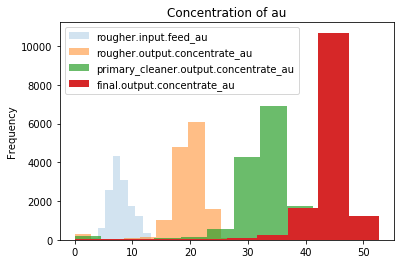

In [ ]:
df_train['rougher.input.feed_au'].plot(kind='hist', legend=True, title='Concentration of au', alpha=0.2)
df_train['rougher.output.concentrate_au'].plot(kind='hist', legend=True, alpha=0.5)
df_train['primary_cleaner.output.concentrate_au'].plot(kind='hist', legend=True,alpha=0.7 )
df_train['final.output.concentrate_au'].plot(kind='hist', legend=True)

Отлично виден рост концентрации золота от этапа к этапу. Распределения нормальные, с легкими хвостами.

The increase in the concentration of gold from stage to stage is clearly visible. The distributions are normal, with light tails.

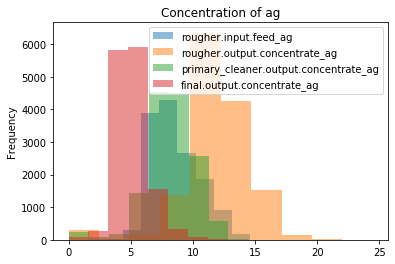

In [ ]:
df_train['rougher.input.feed_ag'].plot(kind='hist', legend=True, title='Concentration of ag', alpha=0.5)
df_train['rougher.output.concentrate_ag'].plot(kind='hist', legend=True, alpha=0.5)
df_train['primary_cleaner.output.concentrate_ag'].plot(kind='hist', legend=True, alpha=0.5)
df_train['final.output.concentrate_ag'].plot(kind='hist', legend=True, alpha=0.5)

С серебром всё не так ясно, но его количество в среднем так или иначе снижается в процессе обработки. Распредления уже не очень нормальные.

With silver, everything is not so clear, but its amount, on average, somehow decreases during processing. The distributions are no longer very normal.

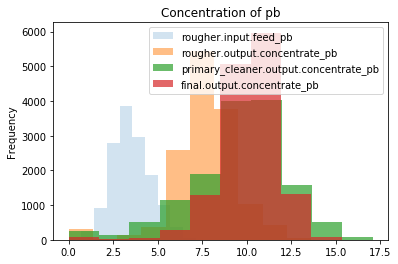

In [ ]:
df_train['rougher.input.feed_pb'].plot(kind='hist', legend=True, title='Concentration of pb', alpha=0.2)
df_train['rougher.output.concentrate_pb'].plot(kind='hist', legend=True, alpha=0.5)
df_train['primary_cleaner.output.concentrate_pb'].plot(kind='hist', legend=True, alpha=0.7)
df_train['final.output.concentrate_pb'].plot(kind='hist', legend=True, alpha=0.7)

По всей видимости содержание свинца, растет вместе с содержанием золота (почти в 5 раз с момента поступления сырья в производство.

Apparently, the lead content is growing along with the gold content (almost 5 times from the moment the raw material enters production.

<a id='Step_9'></a>
## 2.2. Сравним распределения размеров гранул сырья на обучающей и тестовой выборках. 

## 2.2. Let us compare the size distributions of raw material granules on the training and test samples.

Гранулы используются только на входе в этапы флотации и первого уровня отчистки.

Granules are used only at the entrance to the stages of flotation and the first level of cleaning.

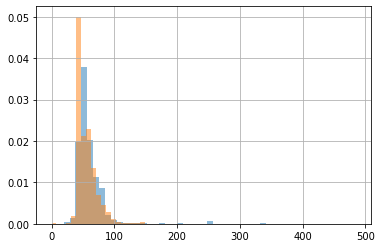

In [ ]:
df_train['rougher.input.feed_size'].hist(alpha=0.5, density=True, bins=50)
df_test['rougher.input.feed_size'].hist(alpha=0.5, density=True, bins=50)

Распределения на этапе флотации в обучении и тесте различаются, но не критично, по-моему мнению.

The distributions at the flotation stage in training and test are different, but not critical, in my opinion.

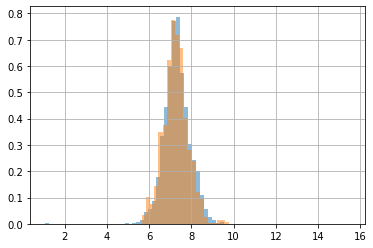

In [ ]:
df_train['primary_cleaner.input.feed_size'].hist(alpha=0.5, density=True, bins=50)
df_test['primary_cleaner.input.feed_size'].hist(alpha=0.5, density=True, bins=50)

На первом уровне очистки распределения почти одинаковые в обучающем и тестовом файлах. 

At the first level of refinement, the distributions are almost the same in the training and test files.

<a id='Step_10'></a>
## 2.3. Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

## 2.3. We investigate the total concentration of all substances at different stages: in raw materials, in rough and final concentrates.

Добавим в обучающий фрейм суммы концетрации веществ на разных этапах для обучающей выборки.

Add to the training frame the sums of concentrations of substances at different stages for the training sample.

In [ ]:
df_train['sum_concentrate_feed'] = (df_train['rougher.input.feed_ag'] + df_train['rougher.input.feed_au'] +
df_train['rougher.input.feed_pb'] + df_train['rougher.input.feed_sol'])
df_train['sum_concentrate_rougher'] = (df_train['rougher.output.concentrate_ag'] + df_train['rougher.output.concentrate_au'] +
df_train['rougher.output.concentrate_pb'] + df_train['rougher.output.concentrate_sol'])
df_train['sum_concentrate_final'] = (df_train['final.output.concentrate_ag'] + df_train['final.output.concentrate_au'] +
df_train['final.output.concentrate_pb'] + df_train['final.output.concentrate_sol'])

Добавим в тестовый фрейм суммы концетрации веществ в сырье: других этапов в этом сете не содержится.

Let's add the sum of the concentration of substances in the raw material to the text frame: there are no other stages in this set.

In [ ]:
df_test['sum_concentrate_feed'] = (df_test['rougher.input.feed_ag'] + df_test['rougher.input.feed_au'] +
df_test['rougher.input.feed_pb'] + df_test['rougher.input.feed_sol'])

Визуализируем полученные данные.

We visualize the received data.

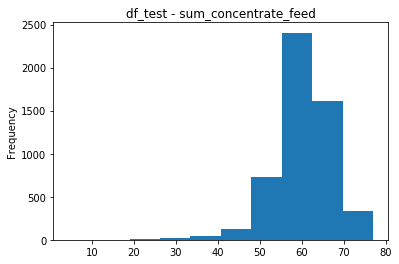

In [ ]:
df_test['sum_concentrate_feed'].plot(kind='hist', title='df_test - sum_concentrate_feed')

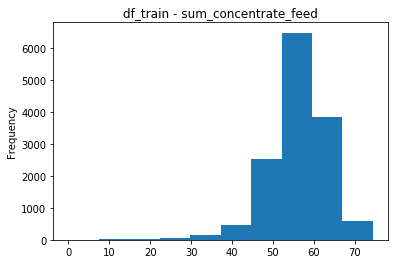

In [ ]:
df_train['sum_concentrate_feed'].plot(kind='hist', title='df_train - sum_concentrate_feed')

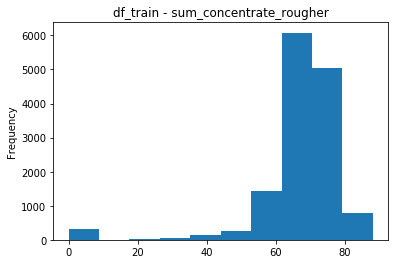

In [ ]:
df_train['sum_concentrate_rougher'].plot(kind='hist', title='df_train - sum_concentrate_rougher')

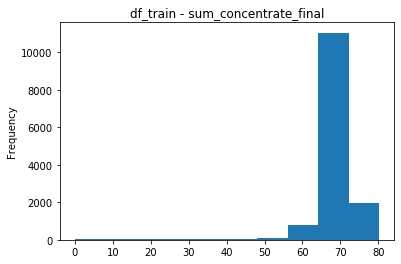

In [ ]:
df_train['sum_concentrate_final'].plot(kind='hist', title='df_train - sum_concentrate_final')

Удалим выбросы вниз (то что не вписывается в полтора интерквартильных размаха вниз) по переменной ssum_concentrate_feed.

Let's remove outliers down (that which does not fit into one and a half interquartile ranges down) in the ssum_concentrate_feed variable.

In [ ]:
# Удалаение выбросов в обучающем файле.
df_train_normal = df_train[(df_train['sum_concentrate_feed']>df_train['sum_concentrate_feed'].dropna().mean()
         -iqr(df_train['sum_concentrate_feed'].dropna())*1.5)]

В обучщающей выборке удалим выбросы по столбцу суммарной концетрации веществ в сырье, исходя из того, что в тестовой выборке у нас есть только такие данные.

In the training sample, we will remove outliers in the column of the total concentration of substances in raw materials, based on the fact that we have only such data in the test sample.

In [ ]:
# Удалаение выбросов в тестовом файле.
df_test_normal = df_test[(df_test['sum_concentrate_feed']>df_test['sum_concentrate_feed'].dropna().mean()
         -iqr(df_test['sum_concentrate_feed'].dropna())*1.5)]

Веротяно, выбросы вниз на этапе поступелния сырья на флотацию, говорят о плохом сырье. На остльных этапах - о плохом сырье и/или неправильной обработке. Удаляем выбросы именно по сырью, так как если оно плохое изначально, то с ним нет смысла работать. Выбросы в большую сторону, вероятно означают изначально богатую руду, поэтомутакие наблюдение удалять  не будем.

Probably, downward emissions at the stage of receipt of raw materials for flotation indicate poor raw materials. At other stages - about bad raw materials and / or improper processing. We remove emissions specifically for raw materials, since if it is bad initially, then there is no point in working with it. Emissions in the big direction probably mean initially rich ore, so we will not remove such observations.

## Summary.
На этом этапе:
- Изучили как изменяется содержание металлов в веществе на всех этапах. Содеражние золота растёт быстрее всего.
- Сравнили распределение гранул в обучающем и тестовом файле. Они похожи - это хорошо.
- Удалили наблюдения с малым суммарным значением содержания металлов в сырье. Такое сырье не взяли бы в производство.

## Summary.
At this stage:
- We studied how the content of metals in the substance changes at all stages. The gold content is growing the fastest.
- Compared the distribution of granules in the training and test file. They are similar, which is good.
- Removed observations with a small total value of the content of metals in the raw material. Such raw materials would not be taken into production.

<a id='Step_11'></a>
# 3. Модель

#3 Model

<a id='Step_12'></a>
## Пункт 3.1. Функция sMAPE.

## Clause 3.1. sMAPE function.

Метрика sMAPE выражается не в абсолютных величинах, а в относительных. Она одинаково учитывает масштаб и целевого признака, и предсказания. Напишем фунцию для ее вычисления в соответствии с указанной в задании формуле.

The sMAPE metric is expressed not in absolute terms, but in relative terms. It equally takes into account the scale of both the target feature and the prediction. Let's write a function for its calculation in accordance with the formula specified in the task.

In [ ]:
def sMAPE(y, y_pred):
    return (sum(abs(y-y_pred) / ((abs(y) + abs(y_pred)) / 2)) / len(y) * 100)

In [ ]:
sMAPE_loss = make_scorer(sMAPE, greater_is_better=False)

Так же напишем функцию для общего sMAPE.

We will also write a function for the general sMAPE.

In [ ]:
def sMAPE_common(sMAPE_rougher, sMAPE_final):
    return (sMAPE_rougher * 0.25 + sMAPE_final * 0.75)

<a id='Step_13'></a>
## 3.2. Обучение и проверка моделей.

## 3.2. Training and validation of models.

Требуется спрогнозировать две величины:
- Эффективность обогащения чернового концентрата rougher.output.recovery. Для этого мы будем использовать только те данные, которые есть в тестовом файле и котороые при этом относятся к этапу Rougher. 
- Эффективность обогащения финального концентрата final.output.recovery. Для этого мы будем использовать только те данные, которые есть в тестовом файле и котороые при этом относятся к этапам следующим за Rougher.

It is required to predict two quantities:
- Rougher concentrate efficiency rougher.output.recovery. To do this, we will use only the data that is in the test file and which at the same time relate to the Rougher stage.
- Efficiency of enrichment of the final concentrate final.output.recovery. To do this, we will use only the data that is in the test file and which at the same time relate to the stages following Rougher.

Получим столбцы, описывающие процесс Rougher.

Get columns describing the Rougher process.

In [ ]:
col_rougher = []
for col in df_test.columns.drop(['rougher.output.recovery', 'final.output.recovery']):
    if 'rougher' in col:
        col_rougher.append(col)
col_rougher

['rougher.input.feed_ag',
 'rougher.input.feed_pb',
 'rougher.input.feed_rate',
 'rougher.input.feed_size',
 'rougher.input.feed_sol',
 'rougher.input.feed_au',
 'rougher.input.floatbank10_sulfate',
 'rougher.input.floatbank10_xanthate',
 'rougher.input.floatbank11_sulfate',
 'rougher.input.floatbank11_xanthate',
 'rougher.state.floatbank10_a_air',
 'rougher.state.floatbank10_a_level',
 'rougher.state.floatbank10_b_air',
 'rougher.state.floatbank10_b_level',
 'rougher.state.floatbank10_c_air',
 'rougher.state.floatbank10_c_level',
 'rougher.state.floatbank10_d_air',
 'rougher.state.floatbank10_d_level',
 'rougher.state.floatbank10_e_air',
 'rougher.state.floatbank10_e_level',
 'rougher.state.floatbank10_f_air',
 'rougher.state.floatbank10_f_level']

Приступим к обучению моделей. Проверка будет осуществляться на кросс-валидации.

Let's start training the models. Verification will be carried out on cross-validation.

In [ ]:
# Получим из обучающего файла регрессоры и целевую переменную для этапа Rougher.
features_train_rougher = df_train_normal[col_rougher]
target_train_rougher = df_train_normal['rougher.output.recovery']
# Получим из обучающего файла регрессоры и целевую переменную для этапа Final.
features_train_final = (df_train_normal[df_test_normal.columns].drop(col_rougher 
                              + ['sum_concentrate_feed', 'final.output.recovery', 'rougher.output.recovery'], axis=1))
target_train_final = df_train_normal['final.output.recovery']

### 1. Регрессия.

### 1. Regression.

Обучение модели для Rougher.

Model training for Rougher.

In [ ]:
model_l_r = LinearRegression()
parameters_l_r = {'fit_intercept':(True, False), 'normalize':(True, False)}
clf_l_r = GridSearchCV(model_l_r, parameters_l_r, cv=5, scoring=sMAPE_loss)
clf_l_r.fit(features_train_rougher, target_train_rougher)
print('sMAPE rougher:', clf_l_r.best_score_)
model_l_f = LinearRegression()
parameters_l_f = {'fit_intercept':(True, False), 'normalize':(True, False)}
clf_l_f = GridSearchCV(model_l_f, parameters_l_f, cv=5, scoring=sMAPE_loss)
clf_l_f.fit(features_train_final, target_train_final)
print('sMAPE final:', clf_l_f.best_score_)
print('sMAPE common:', sMAPE_common(clf_l_r.best_score_, clf_l_f.best_score_))

NameError: name 'LinearRegression' is not defined

### 2. Случайный лес.

### 2. Random forest.

In [ ]:
model_r_r = RandomForestRegressor(random_state=0)
parameters_r_r = {'max_depth': [5, 20], 'n_estimators':[1, 10]}
clf_r_r = GridSearchCV(model_r_r, parameters_r_r, cv=3, scoring=sMAPE_loss)
clf_r_r.fit(features_train_rougher, target_train_rougher)
print('sMAPE rougher:', clf_r_r.best_score_)
model_r_f = RandomForestRegressor(random_state=0)
parameters_r_f = {'max_depth': [5, 20], 'n_estimators':[1, 10]}
clf_r_f = GridSearchCV(model_r_f, parameters_r_f, cv=3, scoring=sMAPE_loss)
clf_r_f.fit(features_train_final, target_train_final)
print('sMAPE final:', clf_r_f.best_score_)
print('sMAPE common:', sMAPE_common(clf_r_r.best_score_, clf_r_f.best_score_))

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


sMAPE rougher: -15.248972614373471
sMAPE final: -16.022377911029483
sMAPE common: -15.829026586865481


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### 3. XGboost.

In [ ]:
model_g_r = GradientBoostingRegressor(random_state=0)
parameters_g_r = {'loss' : ('ls', 'lad'), 'learning_rate' : (0.1, 0.3)}
clf_g_r = GridSearchCV(model_g_r, parameters_g_r, cv=3, scoring=sMAPE_loss)
clf_g_r.fit(features_train_rougher, target_train_rougher)
print('sMAPE rougher:', clf_g_r.best_score_)
model_g_f = GradientBoostingRegressor(random_state=0)
parameters_g_f = {'loss' : ('ls', 'lad'), 'learning_rate' : (0.1, 0.3)}
clf_g_f = GridSearchCV(model_g_f, parameters_g_f, cv=3, scoring=sMAPE_loss)
clf_g_f.fit(features_train_final, target_train_final)
print('sMAPE final:', clf_g_f.best_score_)
print('sMAPE common:', sMAPE_common(clf_g_r.best_score_, clf_g_f.best_score_))

sMAPE rougher: -11.660843962172454
sMAPE final: -12.82751745000648
sMAPE common: -12.535849078047974


### Проверка на тестовых данных. 

### Checking on test data.

Выбираем модель регрессии, так как она дает наименьшее значение функции потерь.

We choose the regression model, since it gives the smallest value of the loss function.

In [ ]:
# Получим из тестового файла регрессоры и целевую переменную для этапа Rougher.
features_test_rougher = df_test_normal[col_rougher]
target_test_rougher = df_test_normal['rougher.output.recovery']
# Получим из тестого файла регрессоры и целевую переменную для этапа Final.
features_test_final = (df_test_normal.drop(col_rougher + 
                                        ['sum_concentrate_feed', 'final.output.recovery', 'rougher.output.recovery'], axis=1))
target_test_final = df_test_normal['final.output.recovery']

Получим общий sMAPE.

We get the overall sMAPE.

In [ ]:
sMAPE_common(sMAPE(target_test_rougher, clf_l_r.predict(features_test_rougher)),
            sMAPE(target_test_final, clf_l_f.predict(features_test_final)))

9.126484773880145

На тестовых данных регрессия сработала еще лучше.

On the test data, the regression worked even better.

## Total summary.
- На первом этапе были загружены, изучены и подготовлены данные: пропуски в регрессорах были заполненны средними, а строки с пропусками в целевых переменных были удалены.
- На втором шаге, мы проанализировали данные. Вывели, что с прохождением этапов обрабоки в концентрате растет содержание золото. Проверили похожесть распределния значений гранул в тестовой и обучающей выборке - выборки похожи. Нашли и удалил наблюдения, где суммарныая концентрация металлов в сырье была слишком мала, препдпологая, что изначально "бедную" руду не примут на производсвто и пронозировать восстановление такого сырья не имеет смысла.
- На третем этапе мы проверили различные модели: линейную регрессию, случайный лес, и градиентный бустинг. Регрессия оказалась наиболее подходящей к имеющимся данным. Кроме того, такую модель легко интерпретировать. Так же мы получили предсказания для тестовой выборки.

## Total summary.
- At the first stage, the data were loaded, studied and prepared: the gaps in the regressors were filled in with the means, and the rows with gaps in the target variables were removed.
- In the second step, we analyzed the data. It was concluded that with the passage of the stages of processing in the concentrate, the gold content increases. We checked the similarity of the distribution of granule values ​​in the test and training samples - the samples are similar. We found and removed observations where the total concentration of metals in the raw material was too low, suggesting that initially "poor" ore would not be accepted for production and it makes no sense to predict the recovery of such raw materials.
- In the third step, we tested different models: linear regression, random forest, and gradient boosting. The regression was found to be the best fit to the available data. In addition, such a model is easy to interpret. We also received predictions for the test sample.